In [437]:
# Loading essential Libraries---------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error



sns.set_style({ 
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': False,
    'ytick.left': False
})

In [270]:
import scipy

# Train and Test data

In [271]:
data_train = pd.read_csv("C:/Users/Dell/Desktop/DataScience 1mg/Train1mg.csv")
data_test = pd.read_csv("C:/Users/Dell/Desktop/DataScience 1mg/test1mg.csv")

In [272]:
data_train

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,num-of-doors,body-style,manufacturer,condition,...,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,petrol,ABS not supported,not installed,3,142.0,two,convertible,mercedes-benz,new,...,234,sli,3.46,3.10,8.30,155.0,4750.0,16,18,35056.0
1,1,petrol,ABS not supported,installed,-1,110.0,four,wagon,dodge,new,...,122,li-ion,3.34,3.46,8.50,88.0,5000.0,24,30,8921.0
2,2,petrol,ABS supported,not installed,-1,95.0,four,sedan,volvo,new,...,141,sli,3.78,3.15,9.50,114.0,5400.0,19,25,22625.0
3,3,petrol,ABS supported,installed,1,158.0,four,sedan,audi,new,...,131,sli,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
4,4,petrol,ABS not supported,installed,0,108.0,four,sedan,nissan,new,...,181,sli,3.43,3.27,9.00,152.0,5200.0,19,25,13499.0
5,5,petrol,ABS not supported,installed,1,122.0,four,sedan,nissan,new,...,97,li-ion,3.15,3.29,9.40,69.0,5200.0,31,37,7499.0
6,6,petrol,ABS not supported,installed,-1,137.0,four,sedan,mitsubishi,new,...,110,wetcell,3.17,3.46,7.50,116.0,5500.0,23,30,9279.0
7,7,petrol,ABS not supported,installed,-1,65.0,four,sedan,toyota,new,...,122,sli,3.31,3.54,8.70,92.0,4200.0,27,32,10898.0
8,8,petrol,ABS not supported,installed,-1,65.0,four,hatchback,toyota,new,...,122,sli,3.31,3.54,8.70,92.0,4200.0,27,32,11248.0
9,9,petrol,ABS not supported,installed,1,NaN,four,wagon,audi,new,...,136,sli,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0


In [273]:
data_train.columns = ['id', 'fuel', 'ABS-compatibility', 'parking-sensor', 'symboling',
       'normalized-losses', 'numofdoors', 'body-style', 'manufacturer',
       'condition', 'wheel-base', 'length', 'width', 'height', 'car-weight',
       'engine-type', 'num-of-persons', 'engine-size', 'battery-type', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

In [274]:
data_train.isnull().sum()
# Presense of NA Values in training data

id                    0
fuel                  0
ABS-compatibility     0
parking-sensor        0
symboling             0
normalized-losses    35
numofdoors            1
body-style            0
manufacturer          0
condition             0
wheel-base            0
length                0
width                 0
height                0
car-weight            0
engine-type           0
num-of-persons        0
engine-size           0
battery-type          0
bore                  3
stroke                3
compression-ratio     0
horsepower            1
peak-rpm              1
city-mpg              0
highway-mpg           0
price                 3
dtype: int64

# Imputing Missing Values in Training data

# Missing value treatment in normalized-losses

In [275]:
nlmean = data_train['normalized-losses'].mean().astype(int)
nlmean

123

In [276]:
data_train['normalized-losses'] = data_train['normalized-losses'].replace(NaN,nlmean).astype(int)
data_train['normalized-losses'].head(10)

0    142
1    110
2     95
3    158
4    108
5    122
6    137
7     65
8     65
9    123
Name: normalized-losses, dtype: int32

# Missing value treatment in Price

In [277]:
pmean = data_train['price'].mean().astype(int)
pmean

13525

In [278]:
data_train['price'] = data_train['price'].replace(NaN,pmean).astype(int)
data_train['price'].head(30)

0     35056
1      8921
2     22625
3     23875
4     13499
5      7499
6      9279
7     10898
8     11248
9     18920
10    11048
11    28248
12     8495
13    16430
14    18150
15     7957
16     5348
17    15998
18     9960
19     8238
20     7957
21    17450
22     9549
23    11259
24    13525
25    16900
26     7895
27    14489
28     8845
29    22470
Name: price, dtype: int32

In [279]:
data_train.dtypes

id                     int64
fuel                  object
ABS-compatibility     object
parking-sensor        object
symboling              int64
normalized-losses      int32
numofdoors            object
body-style            object
manufacturer          object
condition             object
wheel-base           float64
length               float64
width                float64
height               float64
car-weight             int64
engine-type           object
num-of-persons        object
engine-size            int64
battery-type          object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

# Missing value treatment in bore

In [280]:
bmean = data_train['bore'].mean()
bmean

3.325628742514971

In [281]:
data_train['bore'] = data_train['bore'].replace(NaN,bmean)
data_train['bore'].head(40)

0     3.460000
1     3.340000
2     3.780000
3     3.130000
4     3.430000
5     3.150000
6     3.170000
7     3.310000
8     3.310000
9     3.190000
10    3.430000
11    3.580000
12    3.390000
13    3.500000
14    3.610000
15    3.030000
16    3.050000
17    3.270000
18    3.620000
19    3.190000
20    3.030000
21    3.190000
22    3.330000
23    3.620000
24    3.030000
25    3.700000
26    3.150000
27    3.590000
28    3.390000
29    3.010000
30    3.325629
31    3.190000
32    3.350000
33    3.580000
34    2.680000
35    2.970000
36    3.540000
37    3.030000
38    3.270000
39    3.740000
Name: bore, dtype: float64

# Missing value treatment in stroke

In [282]:
smean = data_train['stroke'].mean()
smean

3.265868263473054

In [283]:
data_train['stroke'] = data_train['stroke'].replace(NaN,smean)
data_train['stroke'].head(40)

0     3.100000
1     3.460000
2     3.150000
3     3.400000
4     3.270000
5     3.290000
6     3.460000
7     3.540000
8     3.540000
9     3.400000
10    3.230000
11    3.640000
12    3.390000
13    2.800000
14    3.210000
15    3.390000
16    3.030000
17    3.350000
18    2.640000
19    3.030000
20    3.390000
21    3.400000
22    3.470000
23    2.640000
24    3.110000
25    3.520000
26    3.580000
27    3.860000
28    3.390000
29    3.400000
30    3.265868
31    3.030000
32    3.460000
33    3.860000
34    3.470000
35    3.230000
36    3.070000
37    3.150000
38    3.350000
39    2.900000
Name: stroke, dtype: float64

In [284]:
numofdoors_mapping = {'two' : 2 ,'four' : 4}

In [285]:
data_train.numofdoors = data_train.numofdoors.map(numofdoors_mapping)

In [286]:
data_train.columns

Index(['id', 'fuel', 'ABS-compatibility', 'parking-sensor', 'symboling',
       'normalized-losses', 'numofdoors', 'body-style', 'manufacturer',
       'condition', 'wheel-base', 'length', 'width', 'height', 'car-weight',
       'engine-type', 'num-of-persons', 'engine-size', 'battery-type', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [287]:
data_train['numofdoors']


0      2.0
1      4.0
2      4.0
3      4.0
4      4.0
5      4.0
6      4.0
7      4.0
8      4.0
9      4.0
10     2.0
11     4.0
12     4.0
13     2.0
14     4.0
15     2.0
16     2.0
17     2.0
18     4.0
19     2.0
20     2.0
21     4.0
22     4.0
23     4.0
24     2.0
25     4.0
26     2.0
27     2.0
28     2.0
29     4.0
      ... 
140    4.0
141    4.0
142    2.0
143    4.0
144    4.0
145    4.0
146    2.0
147    4.0
148    4.0
149    4.0
150    2.0
151    4.0
152    4.0
153    4.0
154    2.0
155    4.0
156    4.0
157    2.0
158    4.0
159    4.0
160    2.0
161    2.0
162    4.0
163    4.0
164    2.0
165    2.0
166    4.0
167    4.0
168    4.0
169    4.0
Name: numofdoors, Length: 170, dtype: float64

# Missing value treatment in numofdoors

In [288]:
ndmode = data_train['numofdoors'].mode()
ndmode

0    4.0
dtype: float64

In [289]:
data_train['numofdoors'] = data_train['numofdoors'].replace(NaN,value = 4.0)
data_train['numofdoors'].head(100)

0     2.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     4.0
9     4.0
10    2.0
11    4.0
12    4.0
13    2.0
14    4.0
15    2.0
16    2.0
17    2.0
18    4.0
19    2.0
20    2.0
21    4.0
22    4.0
23    4.0
24    2.0
25    4.0
26    2.0
27    2.0
28    2.0
29    4.0
     ... 
70    4.0
71    4.0
72    4.0
73    4.0
74    2.0
75    4.0
76    2.0
77    4.0
78    4.0
79    4.0
80    2.0
81    2.0
82    4.0
83    2.0
84    2.0
85    4.0
86    4.0
87    4.0
88    2.0
89    4.0
90    4.0
91    4.0
92    2.0
93    4.0
94    2.0
95    2.0
96    2.0
97    2.0
98    2.0
99    2.0
Name: numofdoors, Length: 100, dtype: float64

# Missing value treatment in horsepower

In [290]:
hmean = data_train['horsepower'].mean().astype(int)
hmean

105

In [291]:
data_train['horsepower'] = data_train['horsepower'].replace(NaN,hmean)
data_train['horsepower']

0      155.0
1       88.0
2      114.0
3      140.0
4      152.0
5       69.0
6      116.0
7       92.0
8       92.0
9      110.0
10      90.0
11     123.0
12      84.0
13     101.0
14     142.0
15     102.0
16      62.0
17     161.0
18      94.0
19      70.0
20     102.0
21     115.0
22      97.0
23     111.0
24      70.0
25      95.0
26      86.0
27     145.0
28      84.0
29     106.0
       ...  
140     62.0
141    111.0
142     69.0
143     76.0
144    114.0
145    182.0
146     69.0
147     95.0
148    134.0
149     95.0
150    207.0
151    101.0
152    105.0
153     76.0
154     68.0
155     88.0
156     68.0
157     52.0
158    184.0
159     82.0
160    121.0
161    100.0
162     88.0
163    100.0
164    262.0
165    110.0
166     69.0
167     86.0
168    152.0
169     70.0
Name: horsepower, Length: 170, dtype: float64

# Missing value treatment in peak-rpm

In [292]:
prmean = data_train['peak-rpm'].mean().astype(int)
prmean


5131

In [293]:
data_train['peak-rpm'] = data_train['peak-rpm'].replace(NaN,prmean)
data_train['peak-rpm']

0      4750.0
1      5000.0
2      5400.0
3      5500.0
4      5200.0
5      5200.0
6      5500.0
7      4200.0
8      4200.0
9      5500.0
10     5000.0
11     4350.0
12     4800.0
13     5800.0
14     5600.0
15     5500.0
16     4800.0
17     5200.0
18     5200.0
19     4800.0
20     5500.0
21     5500.0
22     5200.0
23     4800.0
24     5400.0
25     4150.0
26     5800.0
27     5000.0
28     4800.0
29     4800.0
        ...  
140    4800.0
141    4800.0
142    4900.0
143    6000.0
144    5400.0
145    5400.0
146    5200.0
147    4150.0
148    5500.0
149    5000.0
150    5900.0
151    5800.0
152    5131.0
153    6000.0
154    5500.0
155    5000.0
156    5500.0
157    4800.0
158    4500.0
159    4800.0
160    4250.0
161    5500.0
162    5000.0
163    5500.0
164    5000.0
165    5250.0
166    5200.0
167    5800.0
168    5200.0
169    4800.0
Name: peak-rpm, Length: 170, dtype: float64

In [294]:
data_train

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,numofdoors,body-style,manufacturer,condition,...,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,petrol,ABS not supported,not installed,3,142,2.0,convertible,mercedes-benz,new,...,234,sli,3.46,3.10,8.30,155.0,4750.0,16,18,35056
1,1,petrol,ABS not supported,installed,-1,110,4.0,wagon,dodge,new,...,122,li-ion,3.34,3.46,8.50,88.0,5000.0,24,30,8921
2,2,petrol,ABS supported,not installed,-1,95,4.0,sedan,volvo,new,...,141,sli,3.78,3.15,9.50,114.0,5400.0,19,25,22625
3,3,petrol,ABS supported,installed,1,158,4.0,sedan,audi,new,...,131,sli,3.13,3.40,8.30,140.0,5500.0,17,20,23875
4,4,petrol,ABS not supported,installed,0,108,4.0,sedan,nissan,new,...,181,sli,3.43,3.27,9.00,152.0,5200.0,19,25,13499
5,5,petrol,ABS not supported,installed,1,122,4.0,sedan,nissan,new,...,97,li-ion,3.15,3.29,9.40,69.0,5200.0,31,37,7499
6,6,petrol,ABS not supported,installed,-1,137,4.0,sedan,mitsubishi,new,...,110,wetcell,3.17,3.46,7.50,116.0,5500.0,23,30,9279
7,7,petrol,ABS not supported,installed,-1,65,4.0,sedan,toyota,new,...,122,sli,3.31,3.54,8.70,92.0,4200.0,27,32,10898
8,8,petrol,ABS not supported,installed,-1,65,4.0,hatchback,toyota,new,...,122,sli,3.31,3.54,8.70,92.0,4200.0,27,32,11248
9,9,petrol,ABS not supported,installed,1,123,4.0,wagon,audi,new,...,136,sli,3.19,3.40,8.50,110.0,5500.0,19,25,18920


# No Missing Value in Training data

In [295]:
data_train.isnull().sum()

id                   0
fuel                 0
ABS-compatibility    0
parking-sensor       0
symboling            0
normalized-losses    0
numofdoors           0
body-style           0
manufacturer         0
condition            0
wheel-base           0
length               0
width                0
height               0
car-weight           0
engine-type          0
num-of-persons       0
engine-size          0
battery-type         0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Visualisations

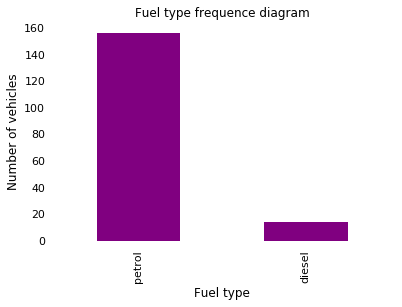

In [296]:
data_train['fuel'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');
# MOST OF THE CARS USE PETROL AS A FUEL TYPE

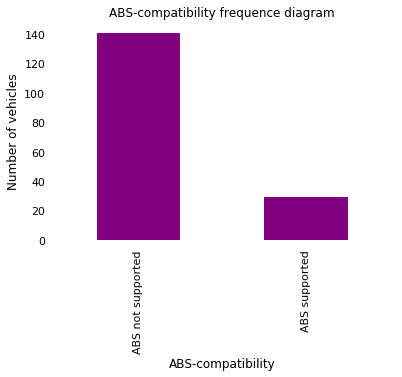

In [297]:
data_train['ABS-compatibility'].value_counts().plot(kind='bar',color='purple')
plt.title("ABS-compatibility frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('ABS-compatibility');
# IN MOST OF THE CARS ABS IS NOT SUPPORTED

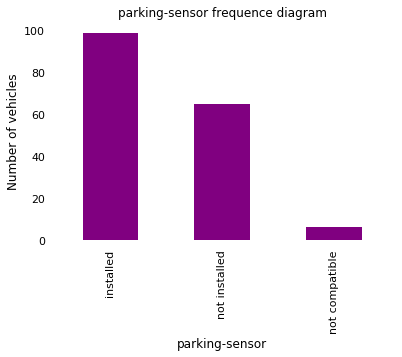

In [298]:
data_train['parking-sensor'].value_counts().plot(kind='bar',color='purple')
plt.title("parking-sensor frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('parking-sensor');
# MOST OF THE CARS HAVE PARKING-SENSOR INSTALLED

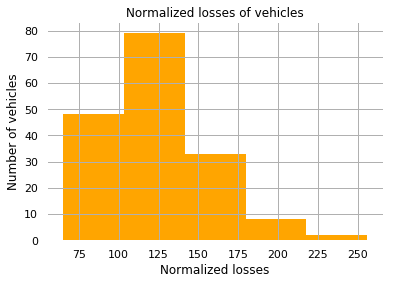

In [299]:
data_train['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');
# average loss payment per insured vehicle ie NORMALIZED LOSS IS POSITIVITY SKEWED

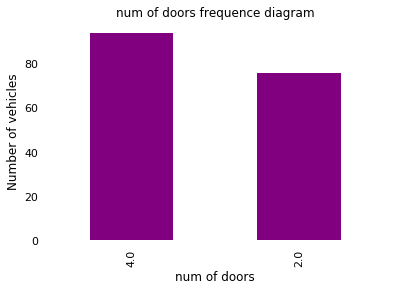

In [300]:
data_train['numofdoors'].value_counts().plot(kind='bar',color='purple')
plt.title("num of doors frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('num of doors');
# MOST OF THE CARS HAVE 4 DOORS 

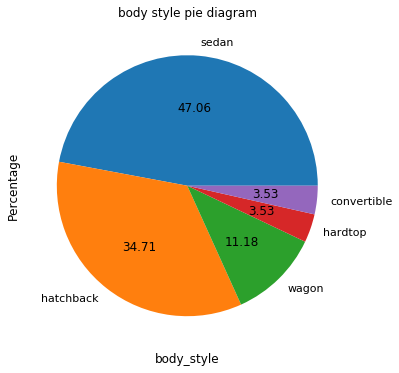

In [301]:
data_train['body-style'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("body style pie diagram")
plt.ylabel('Percentage')
plt.xlabel('body_style');
# HIGHER PERCENTAGE OF CARS CONSISTS OF SEDAN AS A BODY STYLE

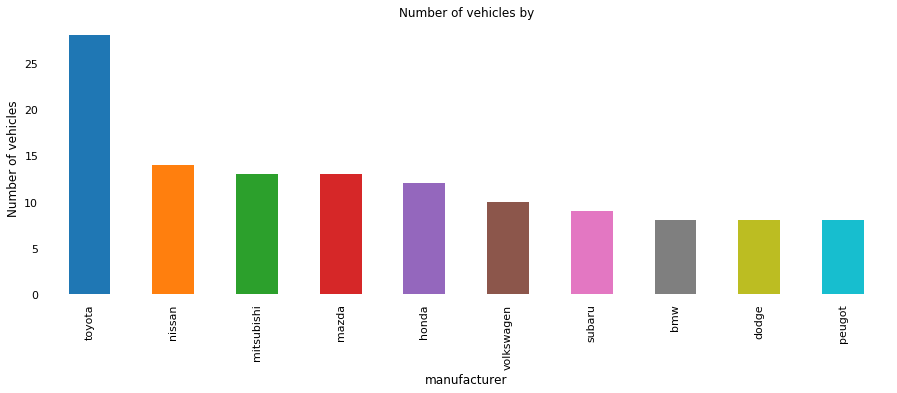

In [302]:
data_train.manufacturer.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by")
plt.ylabel('Number of vehicles')
plt.xlabel('manufacturer');
# HIGHER NUMBER OF CARS BELONG TO TOYOTA MANUFACTURER

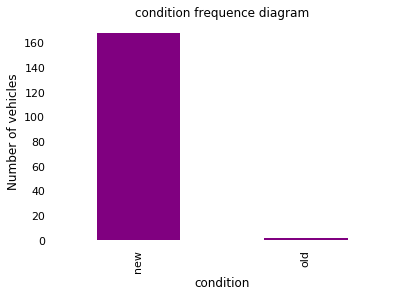

In [303]:
data_train['condition'].value_counts().plot(kind='bar',color='purple')
plt.title("condition frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('condition');
# MOST OF THE CARS ARE IN NEW CONDITION

# CORRELATION PLOT

In [ ]:
# Results---
# 1. Strong positive correlation between car weight and width
# 2. Strong positive correlation between engine size and price
# 3. Strong positive correlation between car weight and price
# 4. Strong positive correlation between horse power and engine size
# 5. Strong positive correlation between car weight and engine size
# 6. Strong positive correlation between car weight and wheel base
# 7. Strong positive correlation between wheel base and width
# 8. Strong positive correlation between length and wheelbase


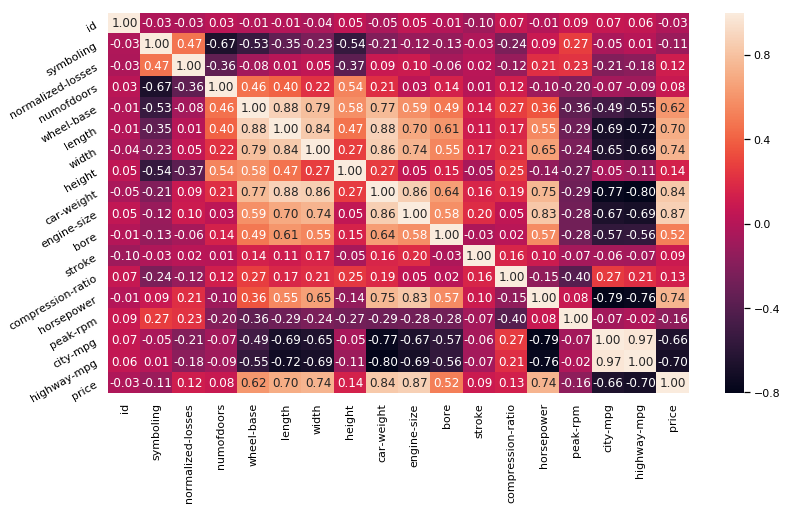

In [304]:
import seaborn as sns
corr = data_train.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

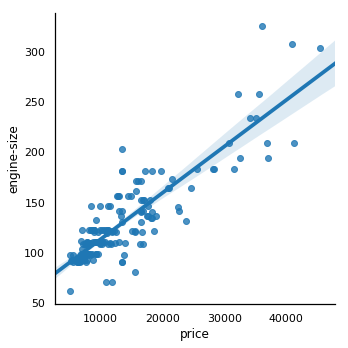

In [305]:
g = sns.lmplot('price',"engine-size", data_train);
# Findings: The more the engine size the costlier the price is

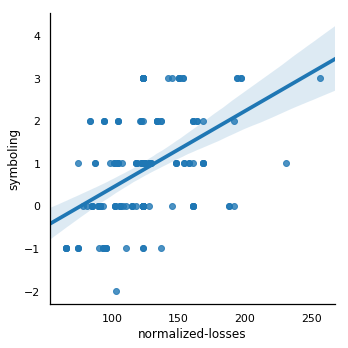

In [306]:
g = sns.lmplot('normalized-losses',"symboling", data_train);
# Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. 
# It looks like the negative ratings are better for the car which has lesser losses.

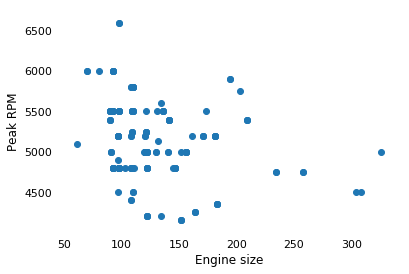

In [307]:
plt.scatter(data_train['engine-size'],data_train['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

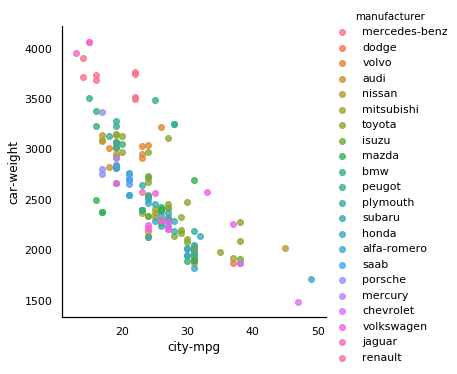

In [308]:
g = sns.lmplot('city-mpg',"car-weight", data_train, hue="manufacturer", fit_reg=False);

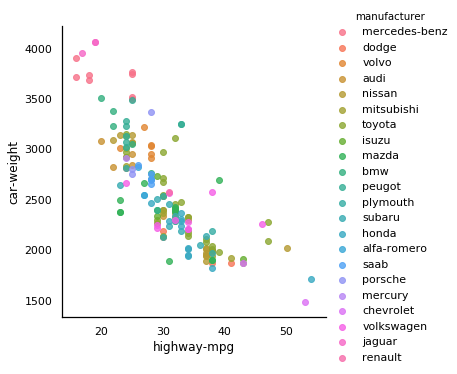

In [309]:
g = sns.lmplot('highway-mpg',"car-weight" , data_train, hue="manufacturer", fit_reg=False);

In [310]:
# Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the 
# automobile is inversely proportional to the car weight.

# Heavier the Automobile less is the mileage for both City and Highway

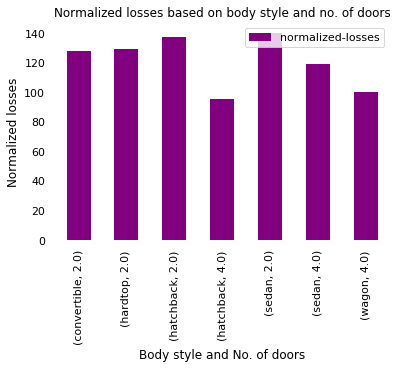

In [311]:
pd.pivot_table(data_train,index=['body-style','numofdoors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

In [312]:
# Findings: As we understand the normalized loss which is the average loss payment per insured vehicle is calculated 
# with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across
# different body style but the two door cars 
# has more number of losses than the four door cars.

In [313]:
data_train.head()

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,numofdoors,body-style,manufacturer,condition,...,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,petrol,ABS not supported,not installed,3,142,2.0,convertible,mercedes-benz,new,...,234,sli,3.46,3.10,8.3,155.0,4750.0,16,18,35056
1,1,petrol,ABS not supported,installed,-1,110,4.0,wagon,dodge,new,...,122,li-ion,3.34,3.46,8.5,88.0,5000.0,24,30,8921
2,2,petrol,ABS supported,not installed,-1,95,4.0,sedan,volvo,new,...,141,sli,3.78,3.15,9.5,114.0,5400.0,19,25,22625
3,3,petrol,ABS supported,installed,1,158,4.0,sedan,audi,new,...,131,sli,3.13,3.40,8.3,140.0,5500.0,17,20,23875
4,4,petrol,ABS not supported,installed,0,108,4.0,sedan,nissan,new,...,181,sli,3.43,3.27,9.0,152.0,5200.0,19,25,13499


# Creating Dummy Variables

In [314]:
df_f = pd.get_dummies(data_train['fuel'],prefix='FT',drop_first=True)
df_f

,FT_petrol
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [315]:
df_a = pd.get_dummies(data_train['ABS-compatibility'],prefix='FT',drop_first=True)
df_a

,FT_ABS supported
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [316]:
df_p = pd.get_dummies(data_train['parking-sensor'],prefix='FT',drop_first=True)
df_p

,FT_not compatible,FT_not installed
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [317]:
df_b = pd.get_dummies(data_train['body-style'],prefix='FT',drop_first=True)
df_b

,FT_hardtop,FT_hatchback,FT_sedan,FT_wagon
0,0,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,0,0,1


In [318]:
df_m = pd.get_dummies(data_train['manufacturer'],prefix='FT',drop_first=True)
df_m

,FT_audi,FT_bmw,FT_chevrolet,FT_dodge,FT_honda,FT_isuzu,FT_jaguar,FT_mazda,FT_mercedes-benz,FT_mercury,...,FT_nissan,FT_peugot,FT_plymouth,FT_porsche,FT_renault,FT_saab,FT_subaru,FT_toyota,FT_volkswagen,FT_volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
df_c = pd.get_dummies(data_train['condition'],prefix='FT',drop_first=True)
df_c

,FT_old
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [320]:
df_e = pd.get_dummies(data_train['engine-type'],prefix='FT',drop_first=True)
df_e

,FT_dohcv,FT_l,FT_ohc,FT_ohcf,FT_ohcv,FT_rotor
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


In [321]:
df_num = pd.get_dummies(data_train['num-of-persons'],prefix='FT',drop_first=True)
df_num

,FT_five,FT_four,FT_six,FT_three,FT_twelve,FT_two
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,1,0,0,0,0,0


In [322]:
df_batterytype = pd.get_dummies(data_train['battery-type'],prefix='FT',drop_first=True)
df_batterytype

,FT_dc,FT_li-ion,FT_msli,FT_sli,FT_ssli,FT_vrla,FT_wetcell
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0


In [323]:
data_train = pd.concat([data_train , df_f , df_a , df_p , df_b , df_m ,  df_c , df_e , df_num , df_batterytype  ],axis=1)

In [324]:
data_train.drop(['fuel','ABS-compatibility','parking-sensor','body-style','manufacturer','condition','engine-type','num-of-persons','battery-type'],axis=1,inplace=True)

In [325]:
data_train.head()

,id,symboling,normalized-losses,numofdoors,wheel-base,length,width,height,car-weight,engine-size,...,FT_three,FT_twelve,FT_two,FT_dc,FT_li-ion,FT_msli,FT_sli,FT_ssli,FT_vrla,FT_wetcell
0,0,3,142,2.0,96.6,180.3,70.5,50.8,3685,234,...,0,0,0,0,0,0,1,0,0,0
1,1,-1,110,4.0,103.3,174.6,64.6,59.8,2535,122,...,0,0,0,0,1,0,0,0,0,0
2,2,-1,95,4.0,109.1,188.8,68.9,55.5,3062,141,...,0,0,0,0,0,0,1,0,0,0
3,3,1,158,4.0,105.8,192.7,71.4,55.9,3086,131,...,0,0,0,0,0,0,1,0,0,0
4,4,0,108,4.0,100.4,184.6,66.5,55.1,3060,181,...,0,0,0,0,0,0,1,0,0,0


In [466]:
data_train.to_csv('data_train_final.csv',encoding='utf-8')

# Test Data

In [327]:
data_test

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,num-of-doors,body-style,manufacturer,condition,...,num-of-persons,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,petrol,ABS not supported,installed,1,119.0,two,hatchback,plymouth,new,...,four,90,li-ion,2.97,3.23,9.4,68.0,5500.0,37,41
1,1,petrol,ABS supported,not installed,-2,103.0,four,sedan,volvo,new,...,four,130,sli,3.62,3.15,7.5,162.0,5100.0,17,22
2,2,petrol,ABS not supported,installed,1,113.0,four,sedan,mazda,new,...,four,91,li-ion,3.08,3.15,9.0,68.0,5000.0,31,38
3,3,petrol,ABS not supported,installed,0,91.0,four,hatchback,toyota,new,...,four,98,li-ion,3.19,3.03,9.0,70.0,4800.0,28,34
4,4,petrol,ABS supported,not installed,-1,95.0,four,sedan,volvo,new,...,four,141,sli,3.78,3.15,8.7,160.0,5300.0,19,25
5,5,petrol,ABS not supported,not compatible,0,85.0,four,wagon,subaru,new,...,four,108,li-ion,3.62,2.64,9.0,82.0,4800.0,23,29
6,6,petrol,ABS not supported,installed,2,83.0,two,hatchback,subaru,new,...,four,108,li-ion,3.62,2.64,8.7,73.0,4400.0,26,31
7,21,petrol,ABS not supported,not installed,3,150.0,two,hatchback,mazda,new,...,two,70,agm,NaN,NaN,9.4,101.0,6000.0,17,23
8,22,diesel,ABS supported,not installed,0,161.0,four,sedan,peugot,new,...,four,152,vrla,3.70,3.52,21.0,95.0,4150.0,28,33
9,23,petrol,ABS not supported,not compatible,0,102.0,four,sedan,subaru,new,...,four,108,li-ion,3.62,2.64,9.0,82.0,4800.0,24,25


In [330]:
data_test.columns

Index(['id', 'fuel', 'ABS-compatibility', 'parking-sensor', 'symboling',
       'normalized-losses', 'num-of-doors', 'body-style', 'manufacturer',
       'condition', 'wheel-base', 'length', 'width', 'height', 'car-weight',
       'engine-type', 'num-of-persons', 'engine-size', 'battery-type', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [333]:
data_test.columns = ['id', 'fuel', 'ABS-compatibility', 'parking-sensor', 'symboling',
       'normalized-losses', 'numofdoors', 'body-style', 'manufacturer',
       'condition', 'wheel-base', 'length', 'width', 'height', 'car-weight',
       'engine-type', 'num-of-persons', 'engine-size', 'battery-type', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

In [334]:
data_test.isnull().sum()
#v Presense of Null Values in Test data

id                   0
fuel                 0
ABS-compatibility    0
parking-sensor       0
symboling            0
normalized-losses    5
numofdoors           1
body-style           0
manufacturer         0
condition            0
wheel-base           0
length               0
width                0
height               0
car-weight           0
engine-type          0
num-of-persons       0
engine-size          0
battery-type         0
bore                 1
stroke               1
compression-ratio    0
horsepower           1
peak-rpm             1
city-mpg             0
highway-mpg          0
dtype: int64

# Missing Value Imputation

# Missing Value imputation for normalized-losses

In [335]:
nlmean_test = data_test['normalized-losses'].mean().astype(int)
nlmean_test

115

In [337]:
data_test['normalized-losses'] = data_test['normalized-losses'].replace(NaN,nlmean_test).astype(int)
data_test['normalized-losses']

0     119
1     103
2     113
3      91
4      95
5      85
6      83
7     150
8     161
9     102
10    150
11    134
12    115
13    115
14     94
15    115
16    128
17    148
18    115
19    115
20     91
Name: normalized-losses, dtype: int32

# Missing Value imputation for bore

In [339]:
bmean_test = data_test['bore'].mean()
bmean_test

3.412

In [340]:
data_test['bore'] = data_test['bore'].replace(NaN,bmean_test)
data_test['bore']

0     2.970
1     3.620
2     3.080
3     3.190
4     3.780
5     3.620
6     3.620
7     3.412
8     3.700
9     3.620
10    3.540
11    3.620
12    3.700
13    3.390
14    3.010
15    3.190
16    3.150
17    2.970
18    3.740
19    3.460
20    3.270
Name: bore, dtype: float64

# Missing Value imputation for stroke

In [341]:
smean_test = data_test['stroke'].mean()
smean_test

3.2049999999999996

In [342]:
data_test['stroke'] = data_test['stroke'].replace(NaN,smean_test)
data_test['stroke']

0     3.230
1     3.150
2     3.150
3     3.030
4     3.150
5     2.640
6     2.640
7     3.205
8     3.520
9     2.640
10    3.070
11    3.500
12    3.520
13    3.390
14    3.400
15    3.400
16    3.290
17    3.230
18    2.900
19    3.900
20    3.350
Name: stroke, dtype: float64

In [343]:
numofdoors_mapping = {'two' : 2 ,'four' : 4}

In [344]:
data_test.numofdoors = data_test.numofdoors.map(numofdoors_mapping)

In [345]:
data_test['numofdoors']

0     2.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     2.0
7     2.0
8     4.0
9     4.0
10    2.0
11    2.0
12    4.0
13    NaN
14    4.0
15    2.0
16    2.0
17    4.0
18    2.0
19    2.0
20    4.0
Name: numofdoors, dtype: float64

# Missing Value imputation for numofdoors

In [346]:
ndmode_test = data_test['numofdoors'].mode()
ndmode_test

0    4.0
dtype: float64

In [347]:
data_test['numofdoors'] = data_test['numofdoors'].replace(NaN,value = 4.0)
data_test['numofdoors']

0     2.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     2.0
7     2.0
8     4.0
9     4.0
10    2.0
11    2.0
12    4.0
13    4.0
14    4.0
15    2.0
16    2.0
17    4.0
18    2.0
19    2.0
20    4.0
Name: numofdoors, dtype: float64

# Missing Value imputation for horsepower

In [348]:
hmean_test = data_test['horsepower'].mean().astype(int)
hmean_test

98

In [349]:
data_test['horsepower'] = data_test['horsepower'].replace(NaN,hmean_test)
data_test['horsepower']

0      68.0
1     162.0
2      68.0
3      70.0
4     160.0
5      82.0
6      73.0
7     101.0
8      95.0
9      82.0
10    160.0
11    116.0
12     95.0
13     64.0
14     68.0
15    110.0
16     69.0
17     68.0
18    207.0
19     98.0
20     56.0
Name: horsepower, dtype: float64

# Missing Value imputation for peak-rpm

In [350]:
prmean_test = data_test['peak-rpm'].mean().astype(int)
prmean_test

5002

In [351]:
data_test['peak-rpm'] = data_test['peak-rpm'].replace(NaN,prmean_test)
data_test['peak-rpm']

0     5500.0
1     5100.0
2     5000.0
3     4800.0
4     5300.0
5     4800.0
6     4400.0
7     6000.0
8     4150.0
9     4800.0
10    5500.0
11    4800.0
12    4150.0
13    4650.0
14    4500.0
15    5500.0
16    5200.0
17    5500.0
18    5900.0
19    5002.0
20    4500.0
Name: peak-rpm, dtype: float64

In [352]:
data_test.isnull().sum()

id                   0
fuel                 0
ABS-compatibility    0
parking-sensor       0
symboling            0
normalized-losses    0
numofdoors           0
body-style           0
manufacturer         0
condition            0
wheel-base           0
length               0
width                0
height               0
car-weight           0
engine-type          0
num-of-persons       0
engine-size          0
battery-type         0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

# Creating Dummy Values

In [364]:
df_f_test = pd.get_dummies(data_test['fuel'],prefix='FT',drop_first=True)
df_f_test

,FT_petrol
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [355]:
df_a_test = pd.get_dummies(data_test['ABS-compatibility'],prefix='FT',drop_first=True)
df_a_test

,FT_ABS supported
0,0
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [356]:
df_p_test = pd.get_dummies(data_test['parking-sensor'],prefix='FT',drop_first=True)
df_p_test

,FT_not compatible,FT_not installed
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
5,1,0
6,0,0
7,0,1
8,0,1
9,1,0


In [357]:
df_b_test = pd.get_dummies(data_test['body-style'],prefix='FT',drop_first=True)
df_b_test

,FT_hatchback,FT_sedan,FT_wagon
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,0,1
6,1,0,0
7,1,0,0
8,0,1,0
9,0,1,0


In [358]:
df_m_test = pd.get_dummies(data_test['manufacturer'],prefix='FT',drop_first=True)
df_m_test

,FT_dodge,FT_mazda,FT_nissan,FT_peugot,FT_plymouth,FT_porsche,FT_renault,FT_saab,FT_subaru,FT_toyota,FT_volkswagen,FT_volvo
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [359]:
df_c_test = pd.get_dummies(data_test['condition'],prefix='FT',drop_first=True)
df_c_test

,FT_old
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [360]:
df_e_test = pd.get_dummies(data_test['engine-type'],prefix='FT',drop_first=True)
df_e_test

,FT_l,FT_ohc,FT_ohcf,FT_rotor
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,0,1,0


In [361]:
df_num_test = pd.get_dummies(data_test['num-of-persons'],prefix='FT',drop_first=True)
df_num_test

,FT_four,FT_six,FT_two
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,1,0,0


In [362]:
df_batterytype_test = pd.get_dummies(data_test['battery-type'],prefix='FT',drop_first=True)
df_batterytype_test

,FT_li-ion,FT_sli,FT_vrla
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,1,0,0
6,1,0,0
7,0,0,0
8,0,0,1
9,1,0,0


In [365]:
data_test = pd.concat([data_test , df_f_test , df_a_test , df_p_test , df_b_test , df_m_test ,  df_c_test , df_e_test , df_num_test , df_batterytype_test  ],axis=1)

In [366]:
data_test.drop(['fuel','ABS-compatibility','parking-sensor','body-style','manufacturer','condition','engine-type','num-of-persons','battery-type'],axis=1,inplace=True)

In [367]:
data_train.head()

,id,symboling,normalized-losses,numofdoors,wheel-base,length,width,height,car-weight,engine-size,...,FT_three,FT_twelve,FT_two,FT_dc,FT_li-ion,FT_msli,FT_sli,FT_ssli,FT_vrla,FT_wetcell
0,0,3,142,2.0,96.6,180.3,70.5,50.8,3685,234,...,0,0,0,0,0,0,1,0,0,0
1,1,-1,110,4.0,103.3,174.6,64.6,59.8,2535,122,...,0,0,0,0,1,0,0,0,0,0
2,2,-1,95,4.0,109.1,188.8,68.9,55.5,3062,141,...,0,0,0,0,0,0,1,0,0,0
3,3,1,158,4.0,105.8,192.7,71.4,55.9,3086,131,...,0,0,0,0,0,0,1,0,0,0
4,4,0,108,4.0,100.4,184.6,66.5,55.1,3060,181,...,0,0,0,0,0,0,1,0,0,0


In [368]:
data_train.columns

Index(['id', 'symboling', 'normalized-losses', 'numofdoors', 'wheel-base',
       'length', 'width', 'height', 'car-weight', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'FT_petrol', 'FT_ABS supported',
       'FT_not compatible', 'FT_not installed', 'FT_hardtop', 'FT_hatchback',
       'FT_sedan', 'FT_wagon', 'FT_audi', 'FT_bmw', 'FT_chevrolet', 'FT_dodge',
       'FT_honda', 'FT_isuzu', 'FT_jaguar', 'FT_mazda', 'FT_mercedes-benz',
       'FT_mercury', 'FT_mitsubishi', 'FT_nissan', 'FT_peugot', 'FT_plymouth',
       'FT_porsche', 'FT_renault', 'FT_saab', 'FT_subaru', 'FT_toyota',
       'FT_volkswagen', 'FT_volvo', 'FT_old', 'FT_dohcv', 'FT_l', 'FT_ohc',
       'FT_ohcf', 'FT_ohcv', 'FT_rotor', 'FT_five', 'FT_four', 'FT_six',
       'FT_three', 'FT_twelve', 'FT_two', 'FT_dc', 'FT_li-ion', 'FT_msli',
       'FT_sli', 'FT_ssli', 'FT_vrla', 'FT_wetcell'],
      dtype='object')

In [381]:
data_test.columns

Index(['id', 'symboling', 'normalized-losses', 'numofdoors', 'wheel-base',
       'length', 'width', 'height', 'car-weight', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'FT_petrol', 'FT_ABS supported', 'FT_not compatible',
       'FT_not installed', 'FT_hatchback', 'FT_sedan', 'FT_wagon', 'FT_dodge',
       'FT_mazda', 'FT_nissan', 'FT_peugot', 'FT_plymouth', 'FT_porsche',
       'FT_renault', 'FT_saab', 'FT_subaru', 'FT_toyota', 'FT_volkswagen',
       'FT_volvo', 'FT_old', 'FT_l', 'FT_ohc', 'FT_ohcf', 'FT_rotor',
       'FT_four', 'FT_six', 'FT_two', 'FT_li-ion', 'FT_sli', 'FT_vrla'],
      dtype='object')

In [393]:
data_test.to_csv('data_test_final.csv',encoding='utf-8')

In [394]:
data_test.to_csv('final.csv',encoding='utf-8')

In [409]:
data_test_f = pd.read_csv("C:/Users/Dell/Desktop/DataScience 1mg/data_test_final.csv")

In [410]:
data_train.shape

(170, 67)

In [411]:
data_test_f.shape

(21, 67)

In [412]:
y_train = data_train['price']

In [413]:
x_train = data_train.drop(["price"],axis=1)

In [414]:
y_test = data_test_f['price']

In [415]:
x_test = data_test_f.drop(["price"],axis=1)

In [416]:
print(x_train.shape)

(170, 66)


In [417]:
print(y_train.shape)

(170,)


In [418]:
print(x_test.shape)

(21, 66)


In [419]:
print(y_test.shape)

(21,)


# Linear Regression to predict prices

In [420]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [421]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [422]:
data_test_f.isnull().sum()

id                   0
symboling            0
normalized-losses    0
numofdoors           0
wheel-base           0
length               0
width                0
height               0
car-weight           0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
FT_petrol            0
FT_ABS supported     0
FT_not compatible    0
FT_not installed     0
FT_hatchback         0
FT_hardtop           0
FT_sedan             0
FT_wagon             0
FT_audi              0
FT_bmw               0
FT_chevrolet         0
FT_dodge             0
FT_honda             0
                    ..
FT_peugot            0
FT_plymouth          0
FT_porsche           0
FT_renault           0
FT_saab              0
FT_subaru            0
FT_toyota            0
FT_volkswagen        0
FT_volvo             0
FT_old               0
FT_dohcv             0
FT_l                 0
FT_ohc     

In [424]:
 y_pred = lm.predict(x_test)

# Predicted Price

In [433]:
y_pred

array([ 8274.28559123, 17003.64000779,  6032.34867951,  7937.42295206,
       21059.76537421,  9882.62822968,  5744.36705181, 12562.07395673,
       17529.17322497,  9363.47935308, 15900.10115103, 14605.02286595,
       17531.00875184, 10899.76085225, 10443.13592418, 18734.20273837,
        7592.15174568,  7182.8113197 , 36172.54513871, 11197.78183548,
        7160.83548876])

# Mean Sqaure Log Error

In [439]:
MSLE_sklearn = mean_squared_log_error(y_test,y_pred) 
MSLE_sklearn

0.23454173926891514

In [454]:
submission = pd.DataFrame({'ID':x_test['id'],'Price': y_pred})

In [455]:
submission

,ID,Price
0,0,8274.285591
1,1,17003.640008
2,2,6032.348680
3,3,7937.422952
4,4,21059.765374
5,5,9882.628230
6,6,5744.367052
7,21,12562.073957
8,22,17529.173225
9,23,9363.479353


In [463]:
bins = np.linspace(min(submission['Price']),max(submission['Price']),4)
group_names = ['Low','Medium','High']
submission['Price-Category'] = pd.cut(submission['Price'],bins,labels = group_names , include_lowest = True)

# Final Submission

In [464]:
submission

,ID,Price,Price-Category
0,0,8274.285591,Low
1,1,17003.640008,Medium
2,2,6032.348680,Low
3,3,7937.422952,Low
4,4,21059.765374,Medium
5,5,9882.628230,Low
6,6,5744.367052,Low
7,21,12562.073957,Low
8,22,17529.173225,Medium
9,23,9363.479353,Low


In [465]:
submission.to_csv('final_Submission.csv',encoding='utf-8')